In [30]:
import pandas as pd
import numpy as np


In [31]:
df=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/ML_KAGGLE_1/data/data.csv")


# Hacemos el df para el predict

test = df[pd.isna(df["x_e_out [-]"])]

test

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
7,7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
10,10,Thompson,tube,NaN,NaN,NaN,1.9,1.9,152.0,3.2
12,12,Thompson,NaN,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8
23,23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1
...,...,...,...,...,...,...,...,...,...,...
31633,31633,Thompson,tube,11.03,NaN,NaN,11.5,11.5,NaN,2.0
31634,31634,Richenderfer,plate,1.01,2000.0,NaN,15.0,120.0,10.0,6.2
31637,31637,Weatherhead,tube,13.79,688.0,NaN,NaN,11.1,457.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9


In [32]:
# Hacemos el dataframe para entrenar

train = df[~pd.isna(df["x_e_out [-]"])]
train

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
5,5,NaN,NaN,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6
...,...,...,...,...,...,...,...,...,...,...
31636,31636,NaN,NaN,12.07,NaN,-0.0195,NaN,1.9,152.0,5.4
31638,31638,Thompson,tube,NaN,3648.0,-0.0487,4.7,4.7,318.0,9.0
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3


In [56]:
# Rellenar valores nulos de columnas con mediana
columnas_med=["pressure [MPa]", "mass_flux [kg/m2-s]","D_e [mm]", "D_h [mm]", "length [mm]" ]

for col in columnas_med:

    mediana=train[col].median()
    train[col].fillna(mediana, inplace=True)

    mediana_pred=test[col].median()
    test[col].fillna(mediana_pred, inplace=True)
    

# Rellenar los valores nulos con la moda en "author" y "geometry"
columnas_moda = ['author', 'geometry']
for columna in columnas_moda:

    moda = train[columna].mode()[0]
    train[columna].fillna(moda, inplace=True)

    moda_pred = test[columna].mode()[0]
    test[columna].fillna(moda_pred, inplace=True)
    
# Convertir las columnas a tipo categorical
for columna in columnas_moda:
    train[columna] = pd.Categorical(train[columna])
    test[columna]=pd.Categorical(test[columna])
test



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
4,4,Thompson,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
7,7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
10,10,Thompson,tube,11.07,2740.0,NaN,1.9,1.9,152.0,3.2
12,12,Thompson,tube,6.89,7500.0,NaN,8.5,12.8,1930.0,4.8
23,23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1
...,...,...,...,...,...,...,...,...,...,...
31633,31633,Thompson,tube,11.03,2740.0,NaN,11.5,11.5,610.0,2.0
31634,31634,Richenderfer,plate,1.01,2000.0,NaN,15.0,120.0,10.0,6.2
31637,31637,Weatherhead,tube,13.79,688.0,NaN,8.5,11.1,457.0,2.3
31640,31640,Thompson,tube,13.79,2740.0,NaN,4.7,4.7,610.0,3.9


In [35]:
X=train.drop(columns="x_e_out [-]")

y=train["x_e_out [-]"]


TRAIN SIZE: (14860, 9)
TEST SIZE: (6369, 9)
TRAIN TARGET SIZE: (14860,)
TEST TARGET SIZE: (6369,)


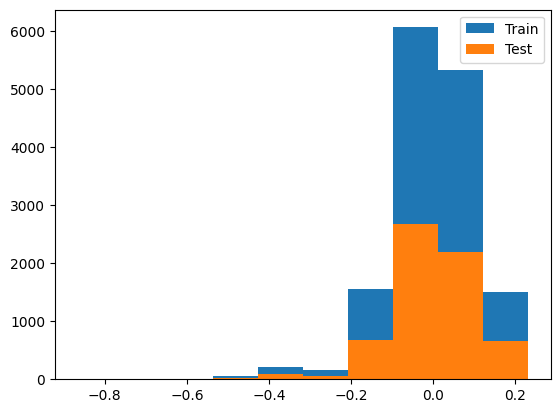

In [36]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=1,
                                                   shuffle=True)

print("TRAIN SIZE:", X_train.shape)
print("TEST SIZE:", X_test.shape)

print("TRAIN TARGET SIZE:", y_train.shape)
print("TEST TARGET SIZE:", y_test.shape)

fig, ax = plt.subplots()
ax.hist(y_train, label = "Train")
ax.hist(y_test, label = "Test")
plt.legend()


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



columnas_categoricas = ['author', 'geometry']


# Transformador para  columnas categóricas

transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), columnas_categoricas)
], remainder='passthrough')

# Crear el pipeline con el transformador y el modelo

pipeline = Pipeline([
    ('transformer', transformer),
    ('model', LinearRegression())
    
])

# Ajustar el modelo

pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['author', 'geometry'])])),
                ('model', LinearRegression())])

In [39]:
y_pred=pipeline.predict(X_test)
y_pred

array([-0.00655992,  0.11858663,  0.0106978 , ...,  0.01322293,
        0.09203135, -0.03928489])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

rmse=mean_squared_error(y_test, y_pred, squared=False)
r2=r2_score(y_test, y_pred)
print(rmse)
print(r2)


0.08762351658569223
0.24851630073703146
